# Baseline Models

In [34]:
import numpy as np
import pandas as pd
import pickle
import os

import statsmodels.api as sm
from sklearn import linear_model, neural_network
from sklearn import model_selection, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

import matplotlib.pyplot as plt

## Load data

In [158]:
def load_data():
    game_data_path = "data/neural_net_data/"
    files = os.listdir(game_data_path)

    with open(game_data_path + "2007-2008.pkl", 'rb') as f:
        X_train, y_train = pickle.load(f, encoding='latin1')

    # flatten X
    X_train = X_train.reshape(X_train.shape[0], -1)


    with open(game_data_path + "2008-2009.pkl", 'rb') as f:
        X_val, y_val = pickle.load(f, encoding='latin1')

    # flatten X
    X_val = X_val.reshape(X_val.shape[0], -1)

    with open(game_data_path + "2009-2010.pkl", 'rb') as f:
        X_test, y_test = pickle.load(f, encoding='latin1')

    # flatten X
    X_test = X_test.reshape(X_test.shape[0], -1)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [159]:
X_train, y_train, X_val, y_val, X_test, y_test = load_data()

In [111]:
X_train.shape

(1267, 1512)

In [112]:
X_val.shape

(1266, 1512)

In [113]:
X_test.shape

(1263, 1512)

## 1. GLMs

In [114]:
# add bias
X_train_wConst = sm.add_constant(X_train)
X_val_wConst = sm.add_constant(X_val)
X_test_wConst = sm.add_constant(X_test)

### Negative Binomial

In [115]:
# Model may need interaction terms
neg_binom_model = sm.GLM(y_train, X_train_wConst, family=sm.families.NegativeBinomial()) # First pass responding variable, then matrix of features
neg_binom_results = neg_binom_model.fit()
print(neg_binom_results.summary())

/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1267
Model:                            GLM   Df Residuals:                      158
Model Family:        NegativeBinomial   Df Model:                         1108
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7839.5
Date:                Sun, 09 Dec 2018   Deviance:                       128.35
Time:                        15:11:33   Pearson chi2:                     85.5
No. Iterations:                   100   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1147      0.172     -0.666      0.505      -0.452       0.223
x2             0.1637      0.157      1.039      0.2

### Poisson

In [116]:
# Can also try poisson regression
poisson_model = sm.GLM(y_train, X_train_wConst, family=sm.families.Poisson()) # First pass responding variable, then matrix of features
poisson_results = poisson_model.fit()
print(poisson_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1267
Model:                            GLM   Df Residuals:                      158
Model Family:                 Poisson   Df Model:                         1108
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6461.4
Date:                Sun, 09 Dec 2018   Deviance:                       4113.9
Time:                        15:14:21   Pearson chi2:                 3.06e+03
No. Iterations:                   100   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0246      0.012     -2.068      0.039      -0.048      -0.001
x2             0.0718      0.011      6.510      0.0

## 2. Linear Regression

In [117]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_val)
# The coefficients
# print('Linreg Coefficients: \n', regr.coef_)
# The mean squared error
print("Linreg Mean squared error: %.2f"
      % metrics.mean_squared_error(y_val, y_pred))
# Explained variance score: 1 is perfect prediction
print('Linreg Variance score: %.2f' % metrics.r2_score(y_val, y_pred))

Linreg Mean squared error: 65452.33
Linreg Variance score: -81.87


### Adding LASSO 

/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.

Lasso sweep results:


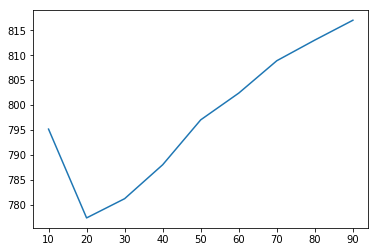

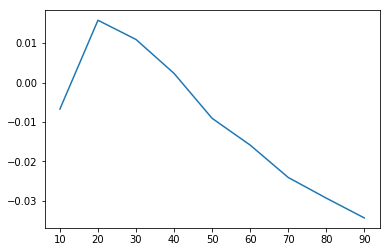

In [140]:
#0.1, 0.5, 1, 5, 10, 100, 
alphas = [10, 20, 30, 40, 50, 60, 70, 80, 90]#, 10000]
mses = []
r2s = []
for a in alphas:
    # Create LASSO
    regr = linear_model.Lasso(alpha = a)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    # Make predictions using the testing set
    y_pred = regr.predict(X_val)
    # The coefficients
    # print('Linreg Coefficients: \n', regr.coef_)
    
    mses.append(metrics.mean_squared_error(y_val, y_pred))
    r2s.append(metrics.r2_score(y_val, y_pred))

print("Lasso sweep results:")
plt.plot(alphas, mses)
plt.show()
plt.plot(alphas, r2s)
plt.show()

## 3. Random Forest

### Depth Sweep

In [143]:
# Sweep found best max depth = 10
depths = [2, 4, 5, 6, 8, 10]
mses = []
r2s = []
for depth in depths:
    # Try random forests
    regr = RandomForestRegressor(n_estimators=50, max_depth=depth,
                                    random_state=2)
    regr.fit(X_train, y_train)
    # Make predictions using the testing set
    y_pred = regr.predict(X_val)
    # The mean squared error
    print("-----")
    print("Depth of {} : ".format(depth))
    print("Random Forest Mean squared error: %.2f"
          % metrics.mean_squared_error(y_val, y_pred))
    mses.append(metrics.mean_squared_error(y_val, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Random Forest Variance score: %.2f' % metrics.r2_score(y_val, y_pred))
    r2s.append(metrics.r2_score(y_val, y_pred))

print("Random Forest depth sweep results:")
print(depths)
print(mses)
print(r2s)

-----
Depth of 2 : 
Random Forest Mean squared error: 848.32
Random Forest Variance score: -0.07
-----
Depth of 4 : 
Random Forest Mean squared error: 895.28
Random Forest Variance score: -0.13
-----
Depth of 5 : 
Random Forest Mean squared error: 920.51
Random Forest Variance score: -0.17
-----
Depth of 6 : 
Random Forest Mean squared error: 949.24
Random Forest Variance score: -0.20
-----
Depth of 8 : 
Random Forest Mean squared error: 1015.85
Random Forest Variance score: -0.29
-----
Depth of 10 : 
Random Forest Mean squared error: 1070.80
Random Forest Variance score: -0.36
Random Forest depth sweep results:
[2, 4, 5, 6, 8, 10]
[848.3159965187608, 895.2831091748188, 920.5066172910349, 949.2443131895351, 1015.8528662056881, 1070.7957248351836]
[-0.0740104113777913, -0.13347312125472843, -0.16540734203974128, -0.2017907000344712, -0.2861204541823712, -0.35568085672233574]


### NTrees Sweep

In [145]:
# Sweep over num trees
ntrees = [20, 50, 100, 500]
mses = []
r2s = []
for ntree in ntrees:
    # Try random forests
    regr = RandomForestRegressor(n_estimators=ntree, max_depth=5,
                                    random_state=2)
    regr.fit(X_train, y_train)
    # Make predictions using the testing set
    y_pred = regr.predict(X_val)
    print("-----")
    print("{} trees: ".format(ntree))
    # The mean squared error
    print("Random Forest Mean squared error: %.2f"
          % metrics.mean_squared_error(y_val, y_pred))
    mses.append(metrics.mean_squared_error(y_val, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Random Forest Variance score: %.2f' % metrics.r2_score(y_val, y_pred))
    r2s.append(metrics.r2_score(y_val, y_pred))

print("Random Forest ntrees sweep results:")
print(ntrees)
print(mses)
print(r2s)

-----
20 trees: 
Random Forest Mean squared error: 961.58
Random Forest Variance score: -0.22
-----
50 trees: 
Random Forest Mean squared error: 920.51
Random Forest Variance score: -0.17
-----
100 trees: 
Random Forest Mean squared error: 909.82
Random Forest Variance score: -0.15
-----
500 trees: 
Random Forest Mean squared error: 908.00
Random Forest Variance score: -0.15


KeyboardInterrupt: 

## 4. Feature Selection

In [146]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler2 = StandardScaler()
# Don't cheat - fit only on training data
scaler.fit(X_train)  
scaler2.fit(y_train[:,np.newaxis])
X_train = scaler.transform(X_train)  
y_train = scaler2.transform(y_train[:,np.newaxis]).squeeze()
# apply same transformation to test data
X_val = scaler.transform(X_val)
y_val = scaler2.transform(y_val[:,np.newaxis]).squeeze()
X_test = scaler.transform(X_test)  
y_test = scaler2.transform(y_test[:,np.newaxis]).squeeze()

/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### PCA

In [206]:
from sklearn.decomposition import PCA


def reduce_dims(n_dims):
    X_train, y_train, X_val, y_val, X_test, y_test = load_data()
    
    pca = PCA(n_components=n_dims)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_val = pca.transform(X_val)
    X_test = pca.transform(X_test)
#     print("Explained variance ratio:")
#     print(str(pca.explained_variance_ratio_))
#     print("")
    
    return X_train, y_train, X_val, y_val, X_test, y_test

### Rerun model with less features

#### MLP

In [198]:
X_train, y_train, X_val, y_val, X_test, y_test = reduce_dims(n_dims=30)

# Create linear regression object
regr = neural_network.MLPRegressor(solver='lbfgs', alpha=1e-5,
                                   activation = 'logistic', hidden_layer_sizes=(30,10),
                                   random_state=1)
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_val)
# The mean squared error
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_val, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_val, y_pred))

Mean squared error: 801.03
Variance score: -0.01


#### Linear Regression

In [209]:
X_train, y_train, X_val, y_val, X_test, y_test = reduce_dims(n_dims=30)

alphas = [5, 10, 20, 100, 150]
mses = []
r2s = []
for a in alphas:
    # Create LASSO
    regr = linear_model.Lasso(alpha = a)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    # Make predictions using the testing set
    y_pred = regr.predict(X_val)
    # The coefficients
    # print('Linreg Coefficients: \n', regr.coef_)
    # The mean squared error
    print("-------")
    print("Alpha: {}".format(a))
    print("Linreg Mean squared error: %.2f"
          % metrics.mean_squared_error(y_val, y_pred))
    mses.append(metrics.mean_squared_error(y_val, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Linreg Variance score: %.2f' % metrics.r2_score(y_val, y_pred))
    r2s.append(metrics.r2_score(y_val, y_pred))
    print("Non-zero coefficients: {}".format(np.sum(regr.coef_ != 0)))
    print(regr.coef_[regr.coef_ != 0])

print("")
print("------")
print("Lasso sweep results:")
print(alphas)
print(mses)
print(r2s)

-------
Alpha: 5
Linreg Mean squared error: 804.26
Linreg Variance score: -0.02
Non-zero coefficients: 28
[ 0.00191593 -0.11194865 -0.00546122 -0.0015291  -0.02217124 -0.01831501
  0.00089549  0.04514272  0.02266034  0.00108744  0.03220836 -0.01010406
  0.06391789  0.06867213  0.14571099  0.06620273  0.08636093  0.0206934
  0.0740493  -0.11973677  0.03273806 -0.17312374  0.03645088 -0.0078951
  0.00950873  0.06370712  0.04113423  0.02155911]
-------
Alpha: 10
Linreg Mean squared error: 794.35
Linreg Variance score: -0.01
Non-zero coefficients: 23
[ 0.0019147  -0.10998093 -0.00302563 -0.01907544 -0.01514346  0.04180199
  0.0191518   0.02794099 -0.00560271  0.05898283  0.06331692  0.13663874
  0.05645701  0.07618299  0.01024747  0.06271083 -0.10761883  0.01993176
 -0.15931358  0.02183984  0.04756716  0.02373756  0.00297457]
-------
Alpha: 20
Linreg Mean squared error: 781.65
Linreg Variance score: 0.01
Non-zero coefficients: 16
[ 0.00191225 -0.10604548 -0.01288385 -0.00880037  0.03512055